In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#import matplotlib.font_manager as fm
import matplotlib
import autotime
%matplotlib inline
%load_ext autotime
#import seaborn as sns
import statsmodels as stm
import statsmodels.formula.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV as GSCV
from dask_searchcv import GridSearchCV as DGSCV

#from sklearn.tree import export_graphviz
#from IPython.display import Image

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# setting variables
cores = 3
SSIDno = '09090786'

time: 1 ms


##  Reading in the data and preparing the SSID dataframe

In [3]:
res = pd.read_csv('Route_XXXX_travel_time_csvs/Route_0084_travel_time.csv')
route_list_SSID42844285 = []
for r in route_list_SSID42844285:
    df = pd.read_csv('Route_XXXX_travel_time_csvs/Route_%s_travel_time.csv' % r)
    res = pd.concat([df, res], axis=0) 
res

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Monday,4132,0,840001,0.0,41704132,False,4170,2012-11-05,59,6010,9.0
1,Monday,4134,0,840001,0.0,41324134,False,4132,2012-11-05,61,6010,9.0
2,Monday,4135,0,840001,0.0,41344135,False,4134,2012-11-05,43,6010,9.0
3,Monday,4136,0,840001,0.0,41354136,False,4135,2012-11-05,36,6010,9.0
4,Monday,4207,0,840001,0.0,41364207,False,4136,2012-11-05,61,6010,9.0
5,Monday,4208,0,840001,0.0,42074208,False,4207,2012-11-05,38,6010,9.0
6,Monday,4210,0,840001,0.0,42084210,False,4208,2012-11-05,102,6010,9.0
7,Monday,4211,0,840001,0.0,42104211,False,4210,2012-11-05,30,6010,9.0
8,Monday,5139,0,840001,0.0,42115139,False,4211,2012-11-05,51,6010,9.0
9,Monday,4214,0,840001,0.0,51394214,False,5139,2012-11-05,38,6010,9.0


time: 228 ms


In [4]:
res.shape

(128037, 12)

time: 2 ms


In [5]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in res:
    print(column + "\t" + str(len(res[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	171
HourFrame	19
JourneyPatternID	6
Rain	72
SSID	1020
SchoolHoliday	2
SourceStopID	171
TimeFrame	57
TravelTime	923
VehicleJourneyID	371
WindSpeed	58
time: 23 ms


In [6]:
# create dataframe for SSID 09090786

res['SSID'] = res['SSID'].astype('category')
ssid_df = res[res.SSID == 42844285] 
ssid_df.shape

(900, 12)

time: 11 ms


In [7]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in ssid_df:
    print(column + "\t" + str(len(ssid_df[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	1
HourFrame	18
JourneyPatternID	3
Rain	61
SSID	1
SchoolHoliday	2
SourceStopID	1
TimeFrame	56
TravelTime	65
VehicleJourneyID	178
WindSpeed	56
time: 6 ms


In [8]:
ssid_df.reset_index(inplace=True)
ssid_df = ssid_df.drop('index', axis=1)
ssid_df.memory_usage(deep=True)

Index                  80
Day                 57817
DestStopID           7200
HourFrame            7200
JourneyPatternID     7200
Rain                 7200
SSID                50920
SchoolHoliday         900
SourceStopID         7200
TimeFrame           60300
TravelTime           7200
VehicleJourneyID     7200
WindSpeed            7200
dtype: int64

time: 7 ms


In [9]:
ssid_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
Day                 900 non-null object
DestStopID          900 non-null int64
HourFrame           900 non-null int64
JourneyPatternID    900 non-null int64
Rain                900 non-null float64
SSID                900 non-null category
SchoolHoliday       900 non-null bool
SourceStopID        900 non-null int64
TimeFrame           900 non-null object
TravelTime          900 non-null int64
VehicleJourneyID    900 non-null int64
WindSpeed           900 non-null float64
dtypes: bool(1), category(1), float64(2), int64(6), object(2)
memory usage: 222.3 KB
time: 6 ms


In [10]:
ssid_df['JourneyPatternID'] = ssid_df['JourneyPatternID'].astype('object')

time: 1 ms


In [11]:
ssid_df

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Tuesday,4285,8,841001,0.000000,42844285,False,4284,2012-11-06,59,5969,15.0
1,Tuesday,4285,14,841001,0.000000,42844285,False,4284,2012-11-06,61,5973,17.0
2,Tuesday,4285,17,841001,0.000000,42844285,False,4284,2012-11-06,62,5975,14.0
3,Tuesday,4285,20,841001,0.000000,42844285,False,4284,2012-11-06,43,5977,15.0
4,Tuesday,4285,21,841001,0.000000,42844285,False,4284,2012-11-06,39,5993,14.0
5,Tuesday,4285,10,841001,0.000000,42844285,False,4284,2012-11-06,78,6001,16.5
6,Tuesday,4285,16,841001,0.000000,42844285,False,4284,2012-11-06,72,6005,15.5
7,Tuesday,4285,19,841001,0.000000,42844285,False,4284,2012-11-06,61,6007,16.0
8,Tuesday,4285,22,841001,0.000000,42844285,False,4284,2012-11-06,43,6009,16.0
9,Tuesday,4285,7,841001,0.033333,42844285,False,4284,2012-11-06,39,6011,14.5


time: 39 ms


In [12]:
# adding Xbuses feature - boolean feature indicating whether or not the JourneyPatternID represents an express (X) bus

ssid_df['XBuses'] = ssid_df[ssid_df["JourneyPatternID"].str.find("X") > 0].sum(axis=1) > 0
ssid_df["XBuses"].fillna(False, inplace=True)
ssid_df['XBuses'] = ssid_df['XBuses'].astype('int')

ssid_df.head(10)

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed,XBuses
0,Tuesday,4285,8,841001,0.000000,42844285,False,4284,2012-11-06,59,5969,15.0,0
1,Tuesday,4285,14,841001,0.000000,42844285,False,4284,2012-11-06,61,5973,17.0,0
2,Tuesday,4285,17,841001,0.000000,42844285,False,4284,2012-11-06,62,5975,14.0,0
3,Tuesday,4285,20,841001,0.000000,42844285,False,4284,2012-11-06,43,5977,15.0,0
4,Tuesday,4285,21,841001,0.000000,42844285,False,4284,2012-11-06,39,5993,14.0,0
5,Tuesday,4285,10,841001,0.000000,42844285,False,4284,2012-11-06,78,6001,16.5,0
6,Tuesday,4285,16,841001,0.000000,42844285,False,4284,2012-11-06,72,6005,15.5,0
7,Tuesday,4285,19,841001,0.000000,42844285,False,4284,2012-11-06,61,6007,16.0,0
8,Tuesday,4285,22,841001,0.000000,42844285,False,4284,2012-11-06,43,6009,16.0,0
9,Tuesday,4285,7,841001,0.033333,42844285,False,4284,2012-11-06,39,6011,14.5,0


time: 23 ms


In [13]:
# adding JPID_length feature - represents the total number of stops traversed by this JourneyPatternID along its entire route

JPIDL = pd.read_csv('JPID_Length.csv')
JPIDL

,Unnamed: 0,JourneyPatternID,JPID_length
0,58,00010001,42
1,97,00010002,21
2,110,00011001,42
3,152,00011002,23
4,167,00040001,60
5,296,00070001,67
6,335,00070002,66
7,410,00080001,46
8,421,00081001,51
9,429,00090001,66


time: 15 ms


In [14]:
JPIDL = JPIDL.drop('Unnamed: 0', axis=1)
ssid_df.JourneyPatternID = ssid_df.JourneyPatternID.apply(lambda x: str(x).zfill(8))
ssid_df = pd.merge(left=ssid_df ,right=JPIDL, how='left', left_on='JourneyPatternID', right_on='JourneyPatternID')
ssid_df = ssid_df.dropna()
ssid_df

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed,XBuses,JPID_length
0,Tuesday,4285,8,00841001,0.000000,42844285,False,4284,2012-11-06,59,5969,15.0,0,87
1,Tuesday,4285,14,00841001,0.000000,42844285,False,4284,2012-11-06,61,5973,17.0,0,87
2,Tuesday,4285,17,00841001,0.000000,42844285,False,4284,2012-11-06,62,5975,14.0,0,87
3,Tuesday,4285,20,00841001,0.000000,42844285,False,4284,2012-11-06,43,5977,15.0,0,87
4,Tuesday,4285,21,00841001,0.000000,42844285,False,4284,2012-11-06,39,5993,14.0,0,87
5,Tuesday,4285,10,00841001,0.000000,42844285,False,4284,2012-11-06,78,6001,16.5,0,87
6,Tuesday,4285,16,00841001,0.000000,42844285,False,4284,2012-11-06,72,6005,15.5,0,87
7,Tuesday,4285,19,00841001,0.000000,42844285,False,4284,2012-11-06,61,6007,16.0,0,87
8,Tuesday,4285,22,00841001,0.000000,42844285,False,4284,2012-11-06,43,6009,16.0,0,87
9,Tuesday,4285,7,00841001,0.033333,42844285,False,4284,2012-11-06,39,6011,14.5,0,87


time: 51 ms


In [15]:
ssid_df.shape

(900, 14)

time: 3 ms


In [16]:
# adding JPID_Freq feature - represents how often in the given data this JourneyPatternID traversed this segment

ssid_df['JPID_Freq'] = ssid_df.groupby(['JourneyPatternID'])['JourneyPatternID'].transform('count')
ssid_df

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed,XBuses,JPID_length,JPID_Freq
0,Tuesday,4285,8,00841001,0.000000,42844285,False,4284,2012-11-06,59,5969,15.0,0,87,601
1,Tuesday,4285,14,00841001,0.000000,42844285,False,4284,2012-11-06,61,5973,17.0,0,87,601
2,Tuesday,4285,17,00841001,0.000000,42844285,False,4284,2012-11-06,62,5975,14.0,0,87,601
3,Tuesday,4285,20,00841001,0.000000,42844285,False,4284,2012-11-06,43,5977,15.0,0,87,601
4,Tuesday,4285,21,00841001,0.000000,42844285,False,4284,2012-11-06,39,5993,14.0,0,87,601
5,Tuesday,4285,10,00841001,0.000000,42844285,False,4284,2012-11-06,78,6001,16.5,0,87,601
6,Tuesday,4285,16,00841001,0.000000,42844285,False,4284,2012-11-06,72,6005,15.5,0,87,601
7,Tuesday,4285,19,00841001,0.000000,42844285,False,4284,2012-11-06,61,6007,16.0,0,87,601
8,Tuesday,4285,22,00841001,0.000000,42844285,False,4284,2012-11-06,43,6009,16.0,0,87,601
9,Tuesday,4285,7,00841001,0.033333,42844285,False,4284,2012-11-06,39,6011,14.5,0,87,601


time: 47 ms


In [17]:
# removing non-holiday-period weekends from SchoolHoliday feature to avoid multi-collinearity issues

ssid_df['SchoolHoliday'] = ssid_df['SchoolHoliday'].astype('int')
ssid_df['SchoolHoliday'] = np.where(ssid_df['TimeFrame'].isin(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05', '2013-01-06']), 1, 0)

time: 2 ms


In [18]:
ssid_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 15 columns):
Day                 900 non-null object
DestStopID          900 non-null int64
HourFrame           900 non-null int64
JourneyPatternID    900 non-null object
Rain                900 non-null float64
SSID                900 non-null category
SchoolHoliday       900 non-null int32
SourceStopID        900 non-null int64
TimeFrame           900 non-null object
TravelTime          900 non-null int64
VehicleJourneyID    900 non-null int64
WindSpeed           900 non-null float64
XBuses              900 non-null int32
JPID_length         900 non-null int64
JPID_Freq           900 non-null int64
dtypes: category(1), float64(2), int32(2), int64(7), object(3)
memory usage: 299.5 KB
time: 6 ms


In [19]:
# fetching SSID number from dataframe for CSV file naming purposes

res.SSID = res.SSID.apply(lambda x: str(int(x)).zfill(8))
r = ssid_df.loc[0, 'SSID'] 

time: 4 ms


In [20]:
# dropping unneeded columns

ssid_df = ssid_df.drop(['SourceStopID', 'DestStopID', 'VehicleJourneyID', 'JourneyPatternID', 'SSID'], axis=1)

time: 3 ms


In [21]:
# reorder remaining columns

ssid_df = ssid_df[['TravelTime', 'Rain', 'WindSpeed', 'JPID_length', 'JPID_Freq', 'XBuses', 'SchoolHoliday', 'Day', 'HourFrame']]

time: 2 ms


In [22]:
ssid_df

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,XBuses,SchoolHoliday,Day,HourFrame
0,59,0.000000,15.0,87,601,0,0,Tuesday,8
1,61,0.000000,17.0,87,601,0,0,Tuesday,14
2,62,0.000000,14.0,87,601,0,0,Tuesday,17
3,43,0.000000,15.0,87,601,0,0,Tuesday,20
4,39,0.000000,14.0,87,601,0,0,Tuesday,21
5,78,0.000000,16.5,87,601,0,0,Tuesday,10
6,72,0.000000,15.5,87,601,0,0,Tuesday,16
7,61,0.000000,16.0,87,601,0,0,Tuesday,19
8,43,0.000000,16.0,87,601,0,0,Tuesday,22
9,39,0.033333,14.5,87,601,0,0,Tuesday,7


time: 29 ms


In [23]:
cores = 3

time: 1 ms


In [24]:
ssid_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 9 columns):
TravelTime       900 non-null int64
Rain             900 non-null float64
WindSpeed        900 non-null float64
JPID_length      900 non-null int64
JPID_Freq        900 non-null int64
XBuses           900 non-null int32
SchoolHoliday    900 non-null int32
Day              900 non-null object
HourFrame        900 non-null int64
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 152.7 KB
time: 5 ms


In [25]:
# assigning appropriate datatypes where necessary

ssid_df['Day'] = ssid_df['Day'].astype('category')
ssid_df['HourFrame'] = ssid_df['HourFrame'].astype('category')
ssid_df['JPID_length'] = ssid_df['JPID_length'].astype('int')

time: 32 ms


In [26]:
# save as csv


ssid_df.to_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 10 ms


## Analysis of target feature TravelTime

Histiogram of values (x-axis is number of seconds)

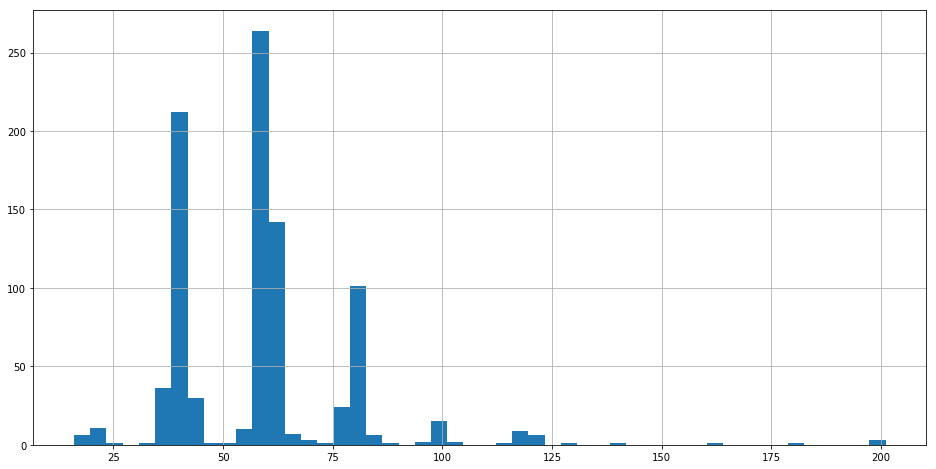

time: 221 ms


In [27]:
ssid_df.TravelTime.hist(figsize=(16, 8), bins=50)

Boxplot to check for outliers

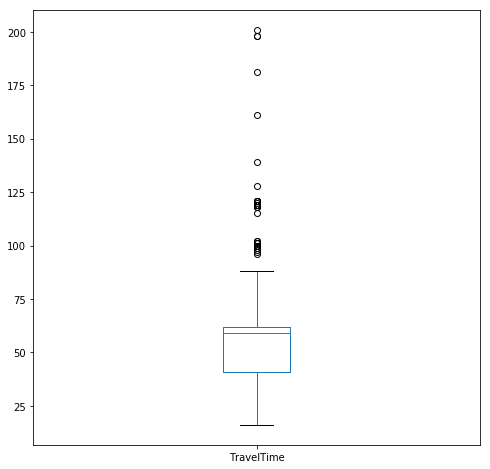

time: 116 ms


In [28]:
ssid_df.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

In [29]:
# Checking stats for TravelTime

ssid_df.TravelTime.describe()

count    900.000000
mean      58.716667
std       20.471385
min       16.000000
25%       41.000000
50%       59.000000
75%       62.000000
max      201.000000
Name: TravelTime, dtype: float64

time: 6 ms


Observation:  So the median and average are both around 59 seconds for this segment.  There are implausible extremes at both ends.

## Dropping outliers

In [30]:
# loading table of times to traverse segments at 80kmph

find_lb = pd.read_csv('use_speed_and_distance_get_outlier_bound.csv')

# extracting value for this segment, to use as lower bound for outlier removal

lb = find_lb.loc[find_lb['SSID'] == 9090786, 'min_sec'].iloc[0]
print(lb)

14.5378563877
time: 12 ms


In [31]:
# make a copy of original df

trimssid_df = ssid_df.copy()

# Remove TravelTime upper bound outliers beyond a conservative 2 x IQR, and lowerbound below 'lb'

ub = trimssid_df.quantile(q=.75) + (2*(trimssid_df.quantile(q=.75)-trimssid_df.quantile(q=.25)))
trimssid_df['OutlierTT'] = (trimssid_df['TravelTime'] < lb) | (trimssid_df['TravelTime'] > ub['TravelTime'])

# Outlier rows counted

print("There will be", trimssid_df[(trimssid_df['OutlierTT'] == True)].shape[0], "outliers dropped.")

There will be 23 outliers dropped.
time: 12 ms


In [32]:
# dropping outliers

trimssid_df = trimssid_df[trimssid_df.OutlierTT != True]
trimssid_df.sort_values(['TravelTime'], ascending=False, inplace=True)
trimssid_df = trimssid_df.drop(['OutlierTT'], axis=1)
trimssid_df.reset_index(inplace=True)
trimssid_df = trimssid_df.drop('index', axis=1)
trimssid_df

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,XBuses,SchoolHoliday,Day,HourFrame
0,102,0.000000,7.0,87,601,0,0,Sunday,13
1,102,0.300000,11.0,87,601,0,0,Friday,12
2,101,0.000000,3.5,87,601,0,0,Thursday,8
3,101,0.000000,13.5,87,220,0,0,Monday,13
4,101,0.000000,6.0,87,601,0,0,Thursday,19
5,100,0.000000,16.5,87,601,0,0,Wednesday,16
6,100,0.000000,2.0,87,220,0,0,Tuesday,13
7,100,0.033333,12.0,87,601,0,0,Monday,16
8,100,0.000000,5.0,87,220,0,0,Thursday,11
9,100,0.000000,5.0,87,601,0,0,Thursday,10


time: 66 ms


In [33]:
# Create TT mean/median value variables, to use in calculating mean/median absolute percentage error scores
# and for horizontal lines in the charts below to represent the mean/medium

ssid_df = trimssid_df
ssid_df_mean = ssid_df.TravelTime.mean()
ssid_df_median  = ssid_df.TravelTime.median()
ssid_df.TravelTime.describe()

count    877.000000
mean      56.704675
std       15.800862
min       16.000000
25%       41.000000
50%       59.000000
75%       62.000000
max      102.000000
Name: TravelTime, dtype: float64

time: 6 ms


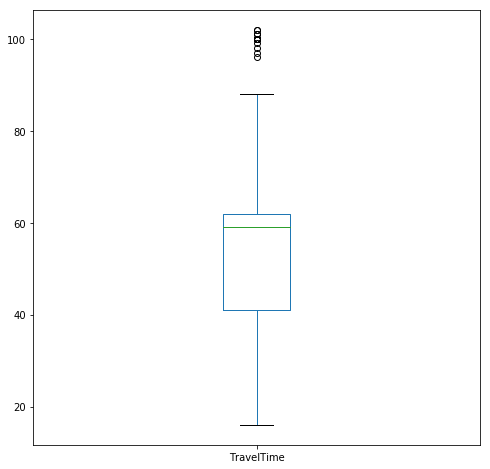

time: 111 ms


In [34]:
ssid_df.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

## Visualising the data

### 1a Bar plot for mean TravelTime per HourFrame

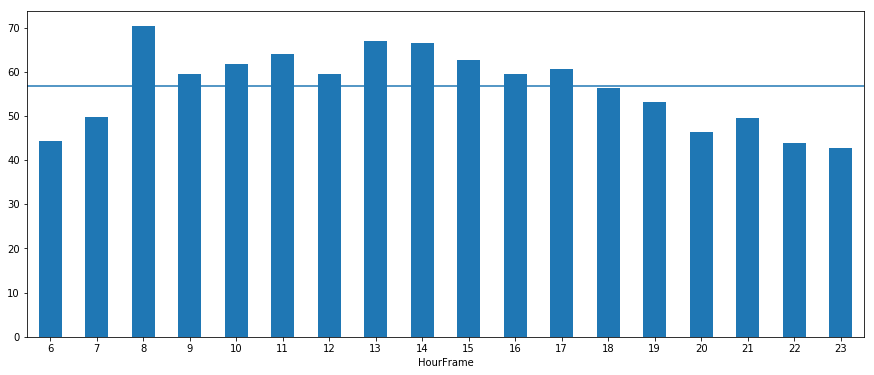

time: 194 ms


In [35]:
mean_HF = ssid_df.groupby('HourFrame')['TravelTime'].mean()
mean_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_mean
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### 1b Bar plot for median TravelTime per HourFrame

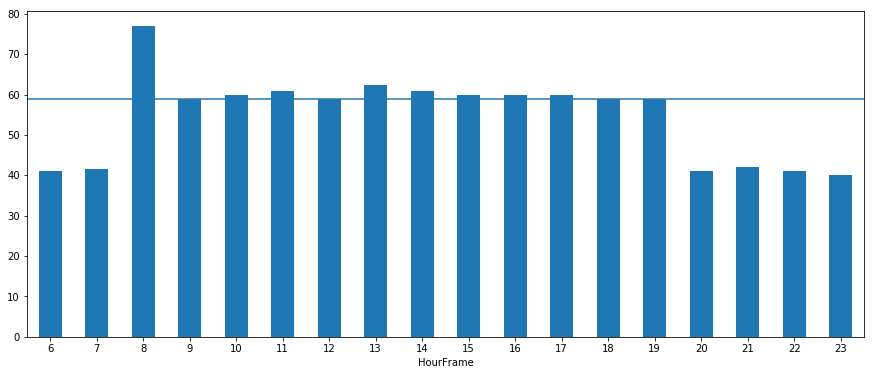

time: 190 ms


In [36]:
med_HF = ssid_df.groupby('HourFrame')['TravelTime'].median()
med_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_median
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

### 2a Bar plot for mean TravelTime per Day

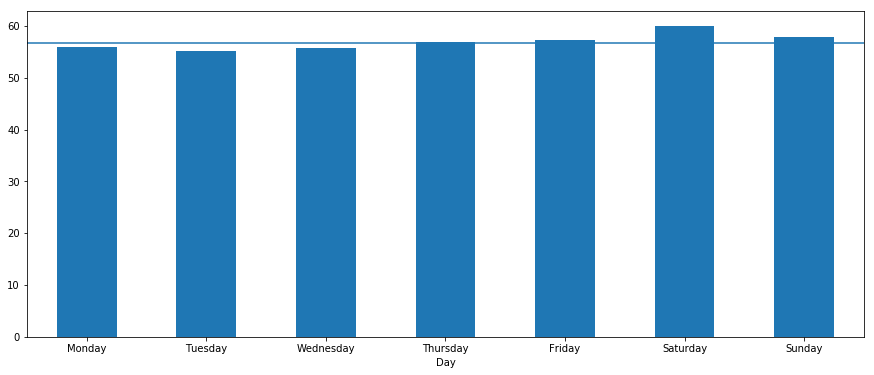

time: 169 ms


In [37]:
mean_Day = ssid_df.groupby('Day')['TravelTime'].mean()
mean_Day=mean_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

mean_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_mean

coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### 2b Bar plot for median TravelTime per HourFrame

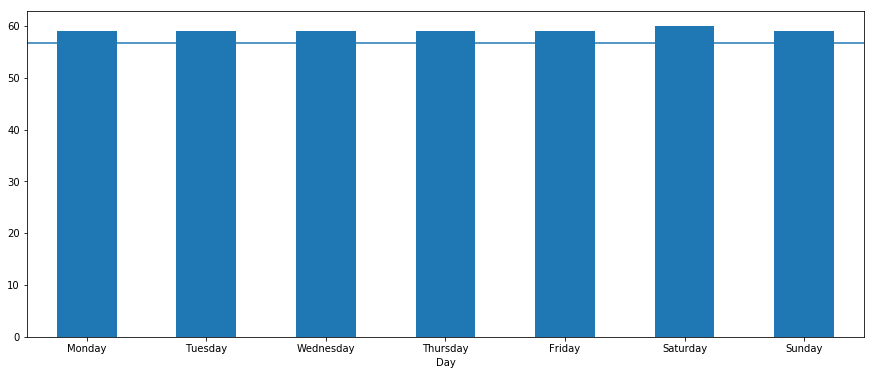

time: 155 ms


In [38]:
med_Day = ssid_df.groupby('Day')['TravelTime'].median()

med_Day=med_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
med_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

### 3a Bar plot for mean TravelTime when SchoolHoliday true/false

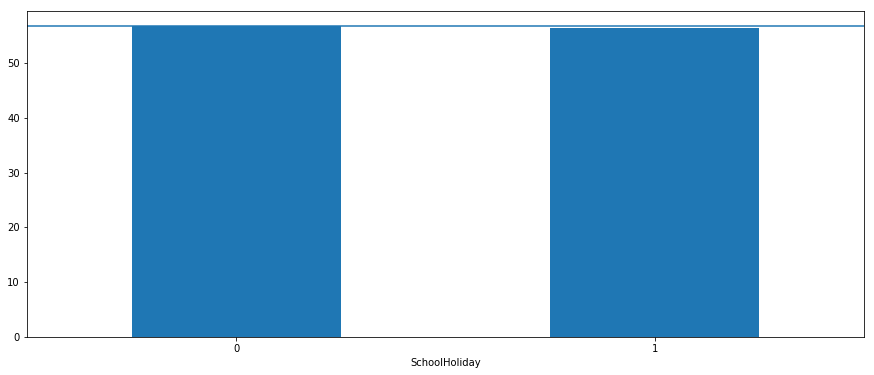

time: 131 ms


In [39]:
mean_SH = ssid_df.groupby('SchoolHoliday')['TravelTime'].mean()
mean_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### 3b Bar plot for median TravelTime when SchoolHoliday true/false

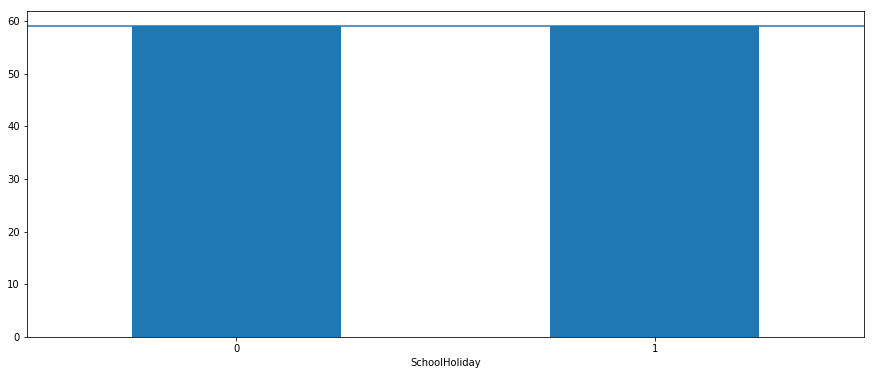

time: 126 ms


In [40]:
med_SH = ssid_df.groupby('SchoolHoliday')['TravelTime'].median()
med_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

## Model training (statsmodels)

### 1a. Linear Regression model (via statsmodels - to see p-values)

Splitting data into 70% for training and 30% for testing

In [41]:
# Code to split data taken from here: http://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

ssid_train=ssid_df.sample(frac=0.7, random_state=38)
ssid_test=ssid_df.drop(ssid_train.index)
print ("Training set size is",len(ssid_train))
print ("Training set size is",len(ssid_test))

Training set size is 614
Training set size is 263
time: 6 ms


In [42]:
lrle = sm.ols(formula="TravelTime ~ SchoolHoliday + WindSpeed + Rain + JPID_length + JPID_Freq + XBuses + C(HourFrame) + C(Day)", data=ssid_train).fit()

time: 118 ms


In [43]:
print(lrle.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     8.497
Date:                Fri, 25 Aug 2017   Prob (F-statistic):           1.24e-28
Time:                        04:41:13   Log-Likelihood:                -2466.7
No. Observations:                 614   AIC:                             4991.
Df Residuals:                     585   BIC:                             5120.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              30.9636    

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [44]:
# repeat on test frame and return Adj. R-squared value

#rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle.predict(ssid_lin_test))
#print ("The predicted adjusted R-squared value on the test frame is", rsqa)

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x0000000008152F60>> (for post_run_cell):


AssertionError: 

### 1b. Repeat Linear Regression model via statsmodels with continuous features normalised

We need to normalise the relevant parts of the original data and then repeat the test/train split

In [45]:
# Normalising continuous features

ssid_lin = ssid_df
ssid_lin['WindSpeed'] = (ssid_lin['WindSpeed']-ssid_lin['WindSpeed'].min())/(ssid_lin['WindSpeed'].max()-ssid_lin['WindSpeed'].min())
ssid_lin['Rain'] = (ssid_lin['Rain']-ssid_lin['Rain'].min())/(ssid_lin['Rain'].max()-ssid_lin['Rain'].min())
ssid_lin['JPID_length'] = (ssid_lin['JPID_length']-ssid_lin['JPID_length'].min())/(ssid_lin['JPID_length'].max()-ssid_lin['JPID_length'].min())
ssid_lin['JPID_Freq'] = (ssid_lin['JPID_Freq']-ssid_lin['JPID_Freq'].min())/(ssid_lin['JPID_Freq'].max()-ssid_lin['JPID_Freq'].min())
ssid_lin

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,XBuses,SchoolHoliday,Day,HourFrame
0,102,0.000000,0.203390,1.0,1.000000,0,0,Sunday,13
1,102,0.065693,0.338983,1.0,1.000000,0,0,Friday,12
2,101,0.000000,0.084746,1.0,1.000000,0,0,Thursday,8
3,101,0.000000,0.423729,1.0,0.270115,0,0,Monday,13
4,101,0.000000,0.169492,1.0,1.000000,0,0,Thursday,19
5,100,0.000000,0.525424,1.0,1.000000,0,0,Wednesday,16
6,100,0.000000,0.033898,1.0,0.270115,0,0,Tuesday,13
7,100,0.007299,0.372881,1.0,1.000000,0,0,Monday,16
8,100,0.000000,0.135593,1.0,0.270115,0,0,Thursday,11
9,100,0.000000,0.135593,1.0,1.000000,0,0,Thursday,10


time: 37 ms


In [46]:
ssid_lin_train=ssid_lin.sample(frac=0.7, random_state=38)
ssid_lin_test=ssid_lin.drop(ssid_lin_train.index)
print ("Training set size is",len(ssid_lin_train))
print ("Training set size is",len(ssid_lin_test))

Training set size is 614
Training set size is 263
time: 27 ms


In [47]:
lrle1 = sm.ols(formula="TravelTime ~ SchoolHoliday + WindSpeed + Rain + JPID_length + JPID_Freq + XBuses + C(HourFrame) + C(Day)", data=ssid_lin_train).fit()

time: 29 ms


In [48]:
print(lrle1.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     8.497
Date:                Fri, 25 Aug 2017   Prob (F-statistic):           1.24e-28
Time:                        04:41:13   Log-Likelihood:                -2466.7
No. Observations:                 614   AIC:                             4991.
Df Residuals:                     585   BIC:                             5120.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              35.7542    

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [49]:
# repeat on test frame and return Adj. R-squared value

# rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle.predict(ssid_lin_test))
# print ("The predicted adjusted R-squared value on the test frame is", rsqa)

time: 1e+03 µs


## Model training (Scikit-learn)

First we need to dreate dummy variables for categorical features, and split into test and training sets

### Prepare data for modelling via Scikit-learn

In [50]:
# create dummy variables from HourFrame and Day using get_dummies
# dropping first values to avoid multicollinearity (Day = Friday, Hour = 0 or 6 or 7, depending on SSID)

Day_dummies = pd.get_dummies(ssid_df.Day, prefix='Day', drop_first=True)
HF_dummies = pd.get_dummies(ssid_df.HourFrame, prefix='HF', drop_first=True)

# concatenate the dummy variable columns onto the original DataFrame and drop the original features
ssid_df = pd.concat([ssid_df, HF_dummies, Day_dummies], axis=1)
ssid_df = ssid_df.drop(['HourFrame', 'Day'], axis=1)
ssid_df

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,XBuses,SchoolHoliday,HF_7,HF_8,HF_9,...,HF_20,HF_21,HF_22,HF_23,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,102,0.000000,0.203390,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,102,0.065693,0.338983,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,101,0.000000,0.084746,1.0,1.000000,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,101,0.000000,0.423729,1.0,0.270115,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,101,0.000000,0.169492,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,100,0.000000,0.525424,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,100,0.000000,0.033898,1.0,0.270115,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,100,0.007299,0.372881,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,100,0.000000,0.135593,1.0,0.270115,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,100,0.000000,0.135593,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


time: 50 ms


In [51]:
# remove any constant features
# code from: https://stackoverflow.com/questions/20209600/panda-dataframe-remove-constant-column

ssid_df = ssid_df.loc[:, (ssid_df != ssid_df.iloc[0]).any()] 

time: 4 ms


In [52]:
ssid_df

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,SchoolHoliday,HF_7,HF_8,HF_9,HF_10,...,HF_20,HF_21,HF_22,HF_23,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,102,0.000000,0.203390,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,102,0.065693,0.338983,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,101,0.000000,0.084746,1.0,1.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,101,0.000000,0.423729,1.0,0.270115,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,101,0.000000,0.169492,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,100,0.000000,0.525424,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,100,0.000000,0.033898,1.0,0.270115,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,100,0.007299,0.372881,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,100,0.000000,0.135593,1.0,0.270115,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,100,0.000000,0.135593,1.0,1.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


time: 62 ms


In [53]:
# prepare a list containing all remaining features bar the target
pred_features = list(ssid_df)
pred_features.remove('TravelTime')
print(pred_features)

['Rain', 'WindSpeed', 'JPID_length', 'JPID_Freq', 'SchoolHoliday', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']
time: 2 ms


In [54]:
# prepare target/predictive feature variables for use in scikit-learn modelling

X = ssid_df[pred_features]
y = ssid_df['TravelTime']

time: 5 ms


In [55]:
# split the data into training portion (70%) and final testing potion (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 38)

time: 5 ms


### 1a Linear Regression model (via scikit-learn) - training - default parameters

In [56]:
lr = LinR(n_jobs = cores)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=3, normalize=False)

time: 429 ms


In [57]:
lr_pred = lr.predict(X_train)
lr_rsq = metrics.r2_score(y_train, lr_pred)
print ("The R-squared value of the Linear Regression model is", lr_rsq)

The R-squared value of the Linear Regression model is 0.305247382793
time: 8 ms


In [58]:
lr_mae = metrics.mean_absolute_error(y_train, lr_pred)
print ("The mean absolute error of the Linear Regression model is", lr_mae)
print ("The mean absolute percentage error is", (((lr_mae)/ssid_df_mean)*100))

The mean absolute error of the Linear Regression model is 9.93171186681
The mean absolute percentage error is 17.5148025481
time: 2 ms


In [59]:
lr_mdae = metrics.median_absolute_error(y_train, lr_pred)
print ("The median absolute error of the Linear Regression model is", lr_mdae)
print ("The median absolute percentage error is", (((lr_mdae)/ssid_df_median)*100))

The median absolute error of the Linear Regression model is 7.4816105426
The median absolute percentage error is 12.6806958349
time: 2 ms


### 1b Linear Regression model (via scikit-learn) - testing - default parameters

In [60]:
lr_preda = lr.predict(X_test)
lr_rsq = metrics.r2_score(y_test, lr_preda)
print ("The R-squared value of the Linear Regression model is", lr_rsq)

The R-squared value of the Linear Regression model is 0.21178347587
time: 2 ms


In [61]:
lr_mae = metrics.mean_absolute_error(y_test, lr_preda)
print ("The mean absolute error of the Linear Regression model is", lr_mae)
print ("The mean absolute percentage error is", (((lr_mae)/ssid_df_mean)*100))

The mean absolute error of the Linear Regression model is 11.1633044101
The mean absolute percentage error is 19.6867443549
time: 2 ms


In [62]:
lr_mdae = metrics.median_absolute_error(y_test, lr_preda)
print ("The median absolute error of the Linear Regression model is", lr_mdae)
print ("The median absolute percentage error is", (((lr_mdae)/ssid_df_median)*100))

The median absolute error of the Linear Regression model is 9.09287805958
The median absolute percentage error is 15.4116577281
time: 2 ms


### 2.1a Support Vector Machine Regression with Linear Kernel model - training - default parameters

In [63]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 24 ms


In [64]:
svr_lin_pred = svr_lin.predict(X_train)
svr_lin_rsq = metrics.r2_score(y_train, svr_lin_pred)
print ("The R-squared value of the SVR with Linear Kernel model is", svr_lin_rsq)

The R-squared value of the SVR with Linear Kernel model is 0.217023899327
time: 11 ms


In [65]:
svr_lin_mae = metrics.mean_absolute_error(y_train, svr_lin_pred)
print ("The mean absolute error of the SVR with Linear Kernel model is", svr_lin_mae)
print ("The mean absolute percentage error is", (((svr_lin_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Linear Kernel model is 9.9773434446
The mean absolute percentage error is 17.5952748862
time: 2 ms


In [66]:
svr_lin_mdae = metrics.median_absolute_error(y_train, svr_lin_pred)
print ("The median absolute error of the SVR with Linear Kernel model is", svr_lin_mdae)
print ("The median absolute percentage error is", (((svr_lin_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Linear Kernel model is 5.86106286254
The median absolute percentage error is 9.93400485177
time: 2 ms


### 2.1b Support Vector Machine Regression with Linear Kernel model - testing - default parameters

In [67]:
svr_lin_preda = svr_lin.predict(X_test)
svr_lin_rsq = metrics.r2_score(y_test, svr_lin_preda)
print ("The R-squared value of the SVR with Linear Kernel model is", svr_lin_rsq)

The R-squared value of the SVR with Linear Kernel model is 0.13339316328
time: 7 ms


In [68]:
svr_lin_mae = metrics.mean_absolute_error(y_test, svr_lin_preda)
print ("The mean absolute error of the SVR with Linear Kernel model is", svr_lin_mae)
print ("The mean absolute percentage error is", (((svr_lin_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Linear Kernel model is 11.1524570639
The mean absolute percentage error is 19.66761481
time: 2 ms


In [69]:
svr_lin_mdae = metrics.median_absolute_error(y_test, svr_lin_preda)
print ("The median absolute error of the SVR with Linear Kernel model is", svr_lin_mdae)
print ("The median absolute percentage error is", (((svr_lin_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Linear Kernel model is 9.35184327743
The median absolute percentage error is 15.8505818261
time: 2 ms


### 2.1c Repeat SVR with Linear Kernel model, continuous data normalised - training  - default parameters

First we have to normalise the relevant data

In [70]:
# Normalising continuous features

ssid_norm = ssid_df
ssid_norm['WindSpeed'] = (ssid_norm['WindSpeed']-ssid_norm['WindSpeed'].min())/(ssid_norm['WindSpeed'].max()-ssid_norm['WindSpeed'].min())
ssid_norm['Rain'] = (ssid_norm['Rain']-ssid_norm['Rain'].min())/(ssid_norm['Rain'].max()-ssid_norm['Rain'].min())
ssid_norm['JPID_length'] = (ssid_norm['JPID_length']-ssid_norm['JPID_length'].min())/(ssid_norm['JPID_length'].max()-ssid_norm['JPID_length'].min())
ssid_norm['JPID_Freq'] = (ssid_norm['JPID_Freq']-ssid_norm['JPID_Freq'].min())/(ssid_norm['JPID_Freq'].max()-ssid_norm['JPID_Freq'].min())
ssid_norm

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,SchoolHoliday,HF_7,HF_8,HF_9,HF_10,...,HF_20,HF_21,HF_22,HF_23,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,102,0.000000,0.203390,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,102,0.065693,0.338983,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,101,0.000000,0.084746,1.0,1.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,101,0.000000,0.423729,1.0,0.270115,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,101,0.000000,0.169492,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,100,0.000000,0.525424,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,100,0.000000,0.033898,1.0,0.270115,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,100,0.007299,0.372881,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,100,0.000000,0.135593,1.0,0.270115,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,100,0.000000,0.135593,1.0,1.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


time: 282 ms


In [71]:
# prepare a list containing all remaining features bar the target

pred_features = list(ssid_norm)
pred_features.remove('TravelTime')
print(pred_features)

['Rain', 'WindSpeed', 'JPID_length', 'JPID_Freq', 'SchoolHoliday', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']
time: 3 ms


In [72]:
# prepare farget/predictive feature variables for use in scikit-learn modelling

X_norm = ssid_norm[pred_features]
y_norm = ssid_norm['TravelTime']

time: 3 ms


In [73]:
# split the data into training portion (70%) and final testing potion (30%)

Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_norm, y_norm, test_size = 0.3, random_state = 38)

time: 6 ms


Now onto modelling

In [74]:
svrn_lin = SVR(kernel='linear')
svrn_lin.fit(Xn_train, yn_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 33 ms


In [75]:
svrn_lin_pred = svrn_lin.predict(X_train)
svrn_lin_rsq = metrics.r2_score(yn_train, svrn_lin_pred)
print ("The R-squared value of the SVR with Linear Kernel model is", svrn_lin_rsq)

The R-squared value of the SVR with Linear Kernel model is 0.217023899327
time: 12 ms


In [76]:
svrn_lin_mae = metrics.mean_absolute_error(y_train, svr_lin_pred)
print ("The mean absolute error of the SVR with Linear Kernel model is", svrn_lin_mae)
print ("The mean absolute percentage error is", (((svrn_lin_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Linear Kernel model is 9.9773434446
The mean absolute percentage error is 17.5952748862
time: 2 ms


In [77]:
svrn_lin_mdae = metrics.median_absolute_error(y_train, svr_lin_pred)
print ("The median absolute error of the SVR with Linear Kernel model is", svrn_lin_mdae)
print ("The median absolute percentage error is", (((svrn_lin_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Linear Kernel model is 5.86106286254
The median absolute percentage error is 9.93400485177
time: 5 ms


### 2.1d Repeat SVR with Linear Kernel model, continuous data normalised - testing  - default parameters

In [78]:
svrn_lin_preda = svrn_lin.predict(Xn_test)
svrn_lin_rsq = metrics.r2_score(yn_test, svrn_lin_preda)
print ("The R-squared value of the SVR with Linear Kernel model is", svr_lin_rsq)

The R-squared value of the SVR with Linear Kernel model is 0.13339316328
time: 7 ms


In [79]:
svrn_lin_mae = metrics.mean_absolute_error(yn_test, svrn_lin_preda)
print ("The mean absolute error of the SVR with Linear Kernel model is", svr_lin_mae)
print ("The mean absolute percentage error is", (((svrn_lin_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Linear Kernel model is 11.1524570639
The mean absolute percentage error is 19.66761481
time: 2 ms


In [80]:
svrn_lin_mdae = metrics.median_absolute_error(yn_test, svrn_lin_preda)
print ("The median absolute error of the SVR with Linear Kernel model is", svr_lin_mdae)
print ("The median absolute percentage error is", (((svrn_lin_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Linear Kernel model is 9.35184327743
The median absolute percentage error is 15.8505818261
time: 5 ms


### 2.2a Support Vector Machine Regression with Polynomial Kernel model - training - default parameters

In [81]:
svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 20 ms


In [82]:
svr_poly_pred = svr_poly.predict(X_train)
svr_poly_rsq = metrics.r2_score(y_train, svr_poly_pred)
print ("The R-squared value of the SVR with Polynomial Kernel model is", svr_poly_rsq)

The R-squared value of the SVR with Polynomial Kernel model is -0.0281050525862
time: 13 ms


In [83]:
svr_poly_mae = metrics.mean_absolute_error(y_train, svr_poly_pred)
print ("The mean absolute error of the SVR with Polynomial Kernel model is", svr_poly_mae)
print ("The mean absolute percentage error is", (((svr_poly_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Polynomial Kernel model is 11.7274729698
The mean absolute percentage error is 20.6816685995
time: 2 ms


In [84]:
svr_poly_mdae = metrics.median_absolute_error(y_train, svr_poly_pred)
print ("The median absolute error of the SVR with Polynomial Kernel model is", svr_poly_mdae)
print ("The median absolute percentage error is", (((svr_poly_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Polynomial Kernel model is 16.0942602736
The median absolute percentage error is 27.2784072435
time: 2 ms


### 2.2b Support Vector Machine Regression with Polynomial Kernel model - testing - default parameters

In [85]:
svr_poly_preda = svr_poly.predict(X_test)
svr_poly_rsq = metrics.r2_score(y_test, svr_poly_preda)
print ("The R-squared value of the SVR with Polynomial Kernel model is", svr_poly_rsq)

The R-squared value of the SVR with Polynomial Kernel model is -0.0114734013013
time: 8 ms


In [86]:
svr_poly_mae = metrics.mean_absolute_error(y_test, svr_poly_preda)
print ("The mean absolute error of the SVR with Polynomial Kernel model is", svr_poly_mae)
print ("The mean absolute percentage error is", (((svr_poly_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Polynomial Kernel model is 11.6829367911
The mean absolute percentage error is 20.6031280229
time: 1e+03 µs


In [87]:
svr_poly_mdae = metrics.median_absolute_error(y_test, svr_poly_preda)
print ("The median absolute error of the SVR with Polynomial Kernel model is", svr_poly_mdae)
print ("The median absolute percentage error is", (((svr_poly_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Polynomial Kernel model is 14.102506218
The median absolute percentage error is 23.9025529119
time: 2 ms


### 2.2c Repeat SVR with Polynomial Kernel model, continuous data normalised - training - default parameters

In [88]:
svrn_poly = SVR(kernel='poly')
svrn_poly.fit(Xn_train, yn_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 26 ms


In [89]:
svrn_poly_pred = svrn_poly.predict(Xn_train)
svrn_poly_rsq = metrics.r2_score(yn_train, svrn_poly_pred)
print ("The R-squared value of the SVR with Polynomial Kernel model is", svrn_poly_rsq)

The R-squared value of the SVR with Polynomial Kernel model is -0.0281050525862
time: 13 ms


In [90]:
svrn_poly_mae = metrics.mean_absolute_error(yn_train, svrn_poly_pred)
print ("The mean absolute error of the SVR with Polynomial Kernel model is", svrn_poly_mae)
print ("The mean absolute percentage error is", (((svrn_poly_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Polynomial Kernel model is 11.7274729698
The mean absolute percentage error is 20.6816685995
time: 3 ms


In [91]:
svrn_poly_mdae = metrics.median_absolute_error(yn_train, svrn_poly_pred)
print ("The median absolute error of the SVR with Polynomial Kernel model is", svrn_poly_mdae)
print ("The median absolute percentage error is", (((svrn_poly_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Polynomial Kernel model is 16.0942602736
The median absolute percentage error is 27.2784072435
time: 2 ms


### 2.2d Repeat SVR with Polynomial Kernel model, continuous data normalised - testing  - default parameters

In [92]:
svrn_poly_preda = svrn_poly.predict(Xn_test)
svrn_poly_rsq = metrics.r2_score(yn_test, svrn_poly_preda)
print ("The R-squared value of the SVR with Polynomial Kernel model is", svrn_poly_rsq)

The R-squared value of the SVR with Polynomial Kernel model is -0.0114734013013
time: 7 ms


In [93]:
svrn_poly_mae = metrics.mean_absolute_error(yn_test, svrn_poly_preda)
print ("The mean absolute error of the SVR with Polynomial Kernel model is", svrn_poly_mae)
print ("The mean absolute percentage error is", (((svrn_poly_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Polynomial Kernel model is 11.6829367911
The mean absolute percentage error is 20.6031280229
time: 1e+03 µs


In [94]:
svrn_poly_mdae = metrics.median_absolute_error(yn_test, svrn_poly_preda)
print ("The median absolute error of the SVR with Polynomial Kernel model is", svrn_poly_mdae)
print ("The median absolute percentage error is", (((svrn_poly_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Polynomial Kernel model is 14.102506218
The median absolute percentage error is 23.9025529119
time: 9 ms


### 2.3a Support Vector Machine Regression with RBF Kernel model - training - default parameters

In [95]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 24 ms


In [96]:
svr_rbf_pred = svr_rbf.predict(X_train)
svr_rbf_rsq = metrics.r2_score(y_train, svr_rbf_pred)
print ("The R-squared value of the SVR with RBF Kernel model is", svr_rbf_rsq)

The R-squared value of the SVR with RBF Kernel model is 0.023296549237
time: 16 ms


In [97]:
svr_rbf_mae = metrics.mean_absolute_error(y_train, svr_rbf_pred)
print ("The mean absolute error of the SVR with RBF Kernel model is", svr_rbf_mae)
print ("The mean absolute percentage error is", (((svr_rbf_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with RBF Kernel model is 11.4526153423
The mean absolute percentage error is 20.196950845
time: 2 ms


In [98]:
svr_rbf_mdae = metrics.median_absolute_error(y_train, svr_rbf_pred)
print ("The median absolute error of the SVR with RBF Kernel model is", svr_rbf_mdae)
print ("The median absolute percentage error is", (((svr_rbf_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with RBF Kernel model is 15.2585465292
The median absolute percentage error is 25.8619432699
time: 3 ms


### 2.3b Support Vector Machine Regression with RBF Kernel model - testing - default parameters

In [99]:
svr_rbf_preda = svr_rbf.predict(X_test)
svr_rbf_rsq = metrics.r2_score(y_test, svr_rbf_preda)
print ("The R-squared value of the SVR with RBF Kernel model is", svr_rbf_rsq)

The R-squared value of the SVR with RBF Kernel model is 0.0218103711028
time: 8 ms


In [100]:
svr_rbf_mae = metrics.mean_absolute_error(y_test, svr_rbf_preda)
print ("The mean absolute error of the SVR with RBF Kernel model is", svr_rbf_mae)
print ("The mean absolute percentage error is", (((svr_rbf_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with RBF Kernel model is 11.5944681271
The mean absolute percentage error is 20.4471114971
time: 1 ms


In [101]:
svr_rbf_mdae = metrics.median_absolute_error(y_test, svr_rbf_preda)
print ("The median absolute error of the SVR with RBF Kernel model is", svr_rbf_mdae)
print ("The median absolute percentage error is", (((svr_rbf_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with RBF Kernel model is 13.577773364
The median absolute percentage error is 23.0131751931
time: 3 ms


### 2.3c Repeat SVR with RBF Kernel model, continuous data normalised - training  - default parameters

In [102]:
svrn_rbf = SVR(kernel='rbf')
svrn_rbf.fit(Xn_train, yn_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 23 ms


In [103]:
svrn_rbf_pred = svrn_rbf.predict(Xn_train)
svrn_rbf_rsq = metrics.r2_score(yn_train, svrn_rbf_pred)
print ("The R-squared value of the SVR with RBF Kernel model is", svrn_rbf_rsq)

The R-squared value of the SVR with RBF Kernel model is 0.023296549237
time: 17 ms


In [104]:
svrn_rbf_mae = metrics.mean_absolute_error(yn_train, svrn_rbf_pred)
print ("The mean absolute error of the SVR with RBF Kernel model is", svrn_rbf_mae)
print ("The mean absolute percentage error is", (((svrn_rbf_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with RBF Kernel model is 11.4526153423
The mean absolute percentage error is 20.196950845
time: 2 ms


In [105]:
svrn_rbf_mdae = metrics.median_absolute_error(yn_train, svrn_rbf_pred)
print ("The median absolute error of the SVR with RBF Kernel model is", svrn_rbf_mdae)
print ("The median absolute percentage error is", (((svrn_rbf_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with RBF Kernel model is 15.2585465292
The median absolute percentage error is 25.8619432699
time: 3 ms


### 2.3d Repeat SVR with RBF Kernel model, continuous data normalised - testing  - default parameters

In [106]:
svrn_rbf_preda = svrn_rbf.predict(Xn_test)
svrn_rbf_rsq = metrics.r2_score(yn_test, svrn_rbf_preda)
print ("The R-squared value of the SVR with RBF Kernel model is", svrn_rbf_rsq)

The R-squared value of the SVR with RBF Kernel model is 0.0218103711028
time: 10 ms


In [107]:
svrn_rbf_mae = metrics.mean_absolute_error(yn_test, svrn_rbf_preda)
print ("The mean absolute error of the SVR with RBF Kernel model is", svrn_rbf_mae)
print ("The mean absolute percentage error is", (((svrn_rbf_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with RBF Kernel model is 11.5944681271
The mean absolute percentage error is 20.4471114971
time: 4 ms


In [108]:
svrn_rbf_mdae = metrics.median_absolute_error(yn_test, svrn_rbf_preda)
print ("The median absolute error of the SVR with RBF Kernel model is", svrn_rbf_mdae)
print ("The median absolute percentage error is", (((svrn_rbf_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with RBF Kernel model is 13.577773364
The median absolute percentage error is 23.0131751931
time: 2 ms


### 3a Decision Tree Regression model - training - default parameters

In [109]:
# code from here: https://gist.github.com/JustGlowing/fa2c0ac39415eb271db6

dtr = DTR()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

time: 7 ms


#### Printing ranking of features by estimated predictive value for Decision Tree Regression

In [110]:
# code adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
indices = np.argsort(dtr.feature_importances_)[::-1]

# Print the ordered feature ranking
print("Ordered feature ranking:")

for f in range(X_train.shape[1]):
    feat = indices[f]
    print(X_train.columns[feat], "\t", dtr.feature_importances_[indices[f]])

Ordered feature ranking:
WindSpeed 	 0.332887558588
Rain 	 0.0761852988315
HF_23 	 0.0502524525584
Day_Thursday 	 0.0474250944607
HF_22 	 0.0451198447811
JPID_Freq 	 0.0365579644839
HF_7 	 0.0349176566355
Day_Wednesday 	 0.0342004717744
Day_Saturday 	 0.0338603203552
HF_21 	 0.0313523362681
Day_Monday 	 0.0307537690344
SchoolHoliday 	 0.0307492450007
HF_20 	 0.0281647666403
Day_Tuesday 	 0.0234553505485
Day_Sunday 	 0.0207222698786
HF_19 	 0.0205615883646
HF_17 	 0.0189358216764
HF_12 	 0.015927005875
HF_8 	 0.0136196510324
HF_13 	 0.0120758873273
HF_16 	 0.0120665575641
HF_14 	 0.00968448428286
HF_9 	 0.0093816339103
HF_10 	 0.0091168017182
HF_15 	 0.00851951191941
JPID_length 	 0.00771511400696
HF_11 	 0.00562110654381
HF_18 	 0.000170435938972
time: 8 ms


In [111]:
dtr_pred = dtr.predict(X_train)
dtr_rsq = metrics.r2_score(y_train, dtr_pred)
print ("The R-squared value of the Decision Tree Regression model is", dtr_rsq)

The R-squared value of the Decision Tree Regression model is 0.96371838153
time: 5 ms


In [112]:
dtr_mae = metrics.mean_absolute_error(y_train, dtr_pred)
print ("The mean absolute error of the Decision Tree Regression model is", dtr_mae)
print ("The mean absolute percentage error is", (((dtr_mae)/ssid_df_mean)*100))

The mean absolute error of the Decision Tree Regression model is 0.654159869494
The mean absolute percentage error is 1.15362599145
time: 3 ms


In [113]:
dtr_mdae = metrics.median_absolute_error(y_train, dtr_pred)
print ("The median absolute error of the Decision Tree Regression model is", dtr_mdae)
print ("The median absolute percentage error is", (((dtr_mdae)/ssid_df_median)*100))

The median absolute error of the Decision Tree Regression model is 0.0
The median absolute percentage error is 0.0
time: 5 ms


### 3b Decision Tree Regression model - testing - default parameters

In [114]:
dtr_preda = dtr.predict(X_test)
dtr_rsq = metrics.r2_score(y_test, dtr_preda)
print ("The R-squared value of the Decision Tree Regression model is", dtr_rsq)

The R-squared value of the Decision Tree Regression model is -0.530108995194
time: 5 ms


In [115]:
dtr_mae = metrics.mean_absolute_error(y_test, dtr_preda)
print ("The mean absolute error of the Decision Tree Regression model is", dtr_mae)
print ("The mean absolute percentage error is", (((dtr_mae)/ssid_df_mean)*100))

The mean absolute error of the Decision Tree Regression model is 15.1016414141
The mean absolute percentage error is 26.632092339
time: 3 ms


In [116]:
dtr_mdae = metrics.median_absolute_error(y_test, dtr_preda)
print ("The median absolute error of the Decision Tree Regression model is", dtr_mdae)
print ("The median absolute percentage error is", (((dtr_mdae)/ssid_df_median)*100))

The median absolute error of the Decision Tree Regression model is 18.0
The median absolute percentage error is 30.5084745763
time: 4 ms


### 4a Decision Tree Regression with AdaBoost model - training - default parameters

In [117]:
abr = ABR()
abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

time: 22 ms


In [118]:
indices = np.argsort(abr.feature_importances_)[::-1]

# Print the ordered feature ranking
print("Ordered feature ranking:")

for f in range(X_train.shape[1]):
    feat = indices[f]
    print(X_train.columns[feat], "\t", dtr.feature_importances_[indices[f]])

Ordered feature ranking:
HF_22 	 0.0451198447811
WindSpeed 	 0.332887558588
HF_23 	 0.0502524525584
HF_7 	 0.0349176566355
HF_21 	 0.0313523362681
HF_19 	 0.0205615883646
HF_13 	 0.0120758873273
Rain 	 0.0761852988315
HF_20 	 0.0281647666403
Day_Tuesday 	 0.0234553505485
HF_8 	 0.0136196510324
Day_Thursday 	 0.0474250944607
JPID_length 	 0.00771511400696
HF_11 	 0.00562110654381
HF_17 	 0.0189358216764
SchoolHoliday 	 0.0307492450007
Day_Saturday 	 0.0338603203552
Day_Sunday 	 0.0207222698786
Day_Monday 	 0.0307537690344
JPID_Freq 	 0.0365579644839
Day_Wednesday 	 0.0342004717744
HF_9 	 0.0093816339103
HF_10 	 0.0091168017182
HF_12 	 0.015927005875
HF_14 	 0.00968448428286
HF_16 	 0.0120665575641
HF_18 	 0.000170435938972
HF_15 	 0.00851951191941
time: 6 ms


In [119]:
abr_pred = abr.predict(X_train)
abr_rsq = metrics.r2_score(y_train, abr_pred)
print ("The R-squared value of the Decision Tree Regression with AdaBoost model is", abr_rsq)

The R-squared value of the Decision Tree Regression with AdaBoost model is 0.115309889439
time: 3 ms


In [120]:
abr_mae = metrics.mean_absolute_error(y_train, abr_pred)
print ("The mean absolute error of the Decision Tree Regression with AdaBoost model is", abr_mae)
print ("The mean absolute percentage error is", (((abr_mae)/ssid_df_mean)*100))

The mean absolute error of the Decision Tree Regression with AdaBoost model is 11.0049871556
The mean absolute percentage error is 19.4075482313
time: 2 ms


In [121]:
abr_mdae = metrics.median_absolute_error(y_train, abr_pred)
print ("The median absolute error of the Decision Tree Regression with AdaBoost model is", abr_mdae)
print ("The median absolute percentage error is", (((abr_mdae)/ssid_df_median)*100))

The median absolute error of the Decision Tree Regression with AdaBoost model is 8.10421286031
The median absolute percentage error is 13.7359540005
time: 3 ms


### 4b Decision Tree Regression with AdaBoost model - testing - default parameters

In [122]:
abr_preda = abr.predict(X_test)
abr_rsq = metrics.r2_score(y_test, abr_preda)
print ("The R-squared value of the Decision Tree Regression with AdaBoost model is", abr_rsq)

The R-squared value of the Decision Tree Regression with AdaBoost model is 0.0208220985591
time: 4 ms


In [123]:
abr_mae = metrics.mean_absolute_error(y_test, abr_preda)
print ("The mean absolute error of the Decision Tree Regression with AdaBoost model is", abr_mae)
print ("The mean absolute percentage error is", (((abr_mae)/ssid_df_mean)*100))

The mean absolute error of the Decision Tree Regression with AdaBoost model is 11.9131919627
The mean absolute percentage error is 21.0091883195
time: 3 ms


In [124]:
abr_mdae = metrics.median_absolute_error(y_test, abr_preda)
print ("The median absolute error of the Decision Tree Regression with AdaBoost model is", abr_mdae)
print ("The median absolute percentage error is", (((abr_mdae)/ssid_df_median)*100))

The median absolute error of the Decision Tree Regression with AdaBoost model is 11.9398148148
The median absolute percentage error is 20.2369742624
time: 3 ms


### 5a Gradient Boosting Regression model - training - default parameters

In [125]:
gbr = GBR()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

time: 45 ms


In [126]:
indices = np.argsort(gbr.feature_importances_)[::-1]

# Print the ordered feature ranking
print("Ordered feature ranking:")

for f in range(X_train.shape[1]):
    feat = indices[f]
    print(X_train.columns[feat], "\t", gbr.feature_importances_[indices[f]])

Ordered feature ranking:
WindSpeed 	 0.329006152603
Rain 	 0.0804786342396
HF_17 	 0.0399757240566
HF_22 	 0.0391257114229
HF_13 	 0.0379636405943
HF_23 	 0.035649449428
HF_7 	 0.0322027277086
HF_10 	 0.0304463759265
HF_8 	 0.0302824052765
HF_21 	 0.0302785309205
HF_20 	 0.0281283097603
Day_Sunday 	 0.0280228561503
JPID_Freq 	 0.0255769329356
HF_14 	 0.0254391740247
Day_Saturday 	 0.0229076940472
Day_Tuesday 	 0.022168255828
HF_11 	 0.0214419755114
Day_Thursday 	 0.0202652657224
SchoolHoliday 	 0.0198312472043
HF_19 	 0.0162296259501
HF_12 	 0.0160763081217
HF_9 	 0.0143060730258
Day_Wednesday 	 0.0134442188125
HF_15 	 0.0116433400476
HF_16 	 0.00953797397427
Day_Monday 	 0.00784331623669
JPID_length 	 0.0061606758263
HF_18 	 0.00556740464457
time: 65 ms


In [127]:
gbr_pred = gbr.predict(X_train)
gbr_rsq = metrics.r2_score(y_train, gbr_pred)
print ("The R-squared value of the Gradient Boosting Regression model is", gbr_rsq)

The R-squared value of the Gradient Boosting Regression model is 0.481755830085
time: 3 ms


In [128]:
gbr_mae = metrics.mean_absolute_error(y_train, gbr_pred)
print ("The mean absolute error of the Gradient Boosting Regression model is", gbr_mae)
print ("The mean absolute percentage error is", (((gbr_mae)/ssid_df_mean)*100))

The mean absolute error of the Gradient Boosting Regression model is 8.69234144679
The mean absolute percentage error is 15.3291442768
time: 3 ms


In [129]:
gbr_mdae = metrics.median_absolute_error(y_train, gbr_pred)
print ("The median absolute error of the Gradient Boosting Regression model is", gbr_mdae)
print ("The median absolute percentage error is", (((gbr_mdae)/ssid_df_median)*100))

The median absolute error of the Gradient Boosting Regression model is 6.96649934562
The median absolute percentage error is 11.8076260095
time: 4 ms


### 5b Gradient Boosting Regression model - - testing - default parameters

In [130]:
gbr_preda = gbr.predict(X_test)
gbr_rsq = metrics.r2_score(y_test, gbr_preda)
print ("The R-squared value of the Gradient Boosting Regression model is", gbr_rsq)

The R-squared value of the Gradient Boosting Regression model is 0.147412807764
time: 3 ms


In [131]:
gbr_mae = metrics.mean_absolute_error(y_test, gbr_preda)
print ("The mean absolute error of the Gradient Boosting Regression model is", gbr_mae)
print ("The mean absolute percentage error is", (((gbr_mae)/ssid_df_mean)*100))

The mean absolute error of the Gradient Boosting Regression model is 11.9116125769
The mean absolute percentage error is 21.0064030363
time: 4 ms


In [132]:
gbr_mdae = metrics.median_absolute_error(y_test, gbr_preda)
print ("The median absolute error of the Gradient Boosting Regression model is", gbr_mdae)
print ("The median absolute percentage error is", (((gbr_mdae)/ssid_df_median)*100))

The median absolute error of the Gradient Boosting Regression model is 10.9454468824
The median absolute percentage error is 18.5516048854
time: 3 ms


### 6a Random Forest Regression model (all default) - training - default parameters

In [133]:
rfr = RFR(n_jobs = cores)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=3, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

time: 114 ms


In [134]:
indices = np.argsort(rfr.feature_importances_)[::-1]

# Print the ordered feature ranking
print("Ordered feature ranking:")

for f in range(X_train.shape[1]):
    feat = indices[f]
    print(X_train.columns[feat], "\t", dtr.feature_importances_[indices[f]])

Ordered feature ranking:
WindSpeed 	 0.332887558588
Rain 	 0.0761852988315
HF_23 	 0.0502524525584
HF_22 	 0.0451198447811
Day_Thursday 	 0.0474250944607
HF_7 	 0.0349176566355
HF_8 	 0.0136196510324
Day_Monday 	 0.0307537690344
Day_Wednesday 	 0.0342004717744
SchoolHoliday 	 0.0307492450007
Day_Sunday 	 0.0207222698786
Day_Tuesday 	 0.0234553505485
HF_21 	 0.0313523362681
HF_19 	 0.0205615883646
HF_20 	 0.0281647666403
JPID_Freq 	 0.0365579644839
Day_Saturday 	 0.0338603203552
HF_13 	 0.0120758873273
HF_14 	 0.00968448428286
HF_10 	 0.0091168017182
HF_17 	 0.0189358216764
HF_12 	 0.015927005875
HF_11 	 0.00562110654381
HF_16 	 0.0120665575641
HF_9 	 0.0093816339103
HF_18 	 0.000170435938972
HF_15 	 0.00851951191941
JPID_length 	 0.00771511400696
time: 109 ms


In [135]:
rfr_pred = rfr.predict(X_train)
rfr_rsq = metrics.r2_score(y_train, rfr_pred)
print ("The R-squared value of the Random Forest Regression model is", rfr_rsq)

The R-squared value of the Random Forest Regression model is 0.810801047924
time: 115 ms


In [136]:
rfr_mae = metrics.mean_absolute_error(y_train, rfr_pred)
print ("The mean absolute error of the Random Forest Regression model is", rfr_mae)
print ("The mean absolute percentage error is", (((rfr_mae)/ssid_df_mean)*100))

The mean absolute error of the Random Forest Regression model is 5.01264274062
The mean absolute percentage error is 8.83991088583
time: 2 ms


In [137]:
rfr_mdae = metrics.median_absolute_error(y_train, rfr_pred)
print ("The median absolute error of the Random Forest Regression model is", rfr_mdae)
print ("The median absolute percentage error is", (((rfr_mdae)/ssid_df_median)*100))

The median absolute error of the Random Forest Regression model is 3.88333333333
The median absolute percentage error is 6.58192090395
time: 4 ms


### 6b Random Forest Regression model (all default) - testing - default parameters

In [138]:
rfr_preda = rfr.predict(X_test)
rfr_rsq = metrics.r2_score(y_test, rfr_preda)
print ("The R-squared value of the Random Forest Regression model is", rfr_rsq)

The R-squared value of the Random Forest Regression model is 0.050235766615
time: 105 ms


In [139]:
rfr_mae = metrics.mean_absolute_error(y_test, rfr_preda)
print ("The mean absolute error of the Random Forest Regression model is", rfr_mae)
print ("The mean absolute percentage error is", (((rfr_mae)/ssid_df_mean)*100))

The mean absolute error of the Random Forest Regression model is 12.3736742424
The mean absolute percentage error is 21.8212594221
time: 2 ms


In [140]:
rfr_mdae = metrics.median_absolute_error(y_test, rfr_preda)
print ("The median absolute error of the Random Forest Regression model is", rfr_mdae)
print ("The median absolute percentage error is", (((rfr_mdae)/ssid_df_median)*100))

The median absolute error of the Random Forest Regression model is 10.4
The median absolute percentage error is 17.6271186441
time: 3 ms
